In [1]:
import LoadSpeckieData
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
calfile = '/g/data/up71/projects/CalVal_Phase2/FLAME/CALIBRATION/RadCalCoeff_GT08_.csv'


In [3]:
allSpeckiedata = LoadSpeckieData.load_from_dir('/g/data/up71/projects/CalVal_Phase2/Speckie/31JUL20/se_31_7_2020/', calfile)

In [4]:
allSpeckiedata.Wavelength = allSpeckiedata.Wavelength.astype(int)

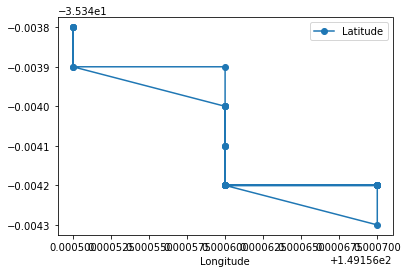

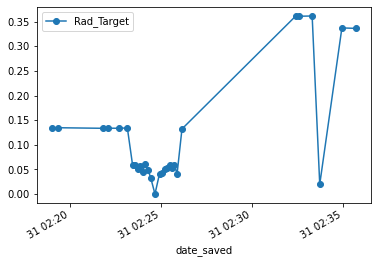

In [5]:
allSpeckiedata[allSpeckiedata.index==550].plot('Longitude', 'Latitude', style='-o')
allSpeckiedata[allSpeckiedata.index==550].plot('date_saved', 'Rad_Target', style='-o')

In [6]:
import LoadASDData

In [7]:
suffix = '.asd.rad.txt'
firstGoodLine = 1
Corners = [0,0,0,0,0,0]
allASDdata = LoadASDData.load_from_dir('/g/data/up71/projects/CalVal_Phase2/Speckie/31JUL20/asd_31_7_2020/', suffix, firstGoodLine, Corners)

In [8]:
allASDdata

,Wavelength,radiance,filename,date_saved,Latitude,Longitude,Line,Spec_number,Inst_number
0,350,0.091634,asd_se_ga_panel00000.asd.rad,2020-07-31 02:24:02,-35.344260,149.156675,1,0,18179/2
1,351,0.092289,asd_se_ga_panel00000.asd.rad,2020-07-31 02:24:02,-35.344260,149.156675,1,0,18179/2
2,352,0.092598,asd_se_ga_panel00000.asd.rad,2020-07-31 02:24:02,-35.344260,149.156675,1,0,18179/2
3,353,0.093693,asd_se_ga_panel00000.asd.rad,2020-07-31 02:24:02,-35.344260,149.156675,1,0,18179/2
4,354,0.094659,asd_se_ga_panel00000.asd.rad,2020-07-31 02:24:02,-35.344260,149.156675,1,0,18179/2
...,...,...,...,...,...,...,...,...,...
2146,2496,0.000009,asd_se_ga_line200025.asd.rad,2020-07-31 02:32:06,-35.344232,149.156678,2,25,18179/2
2147,2497,0.000048,asd_se_ga_line200025.asd.rad,2020-07-31 02:32:06,-35.344232,149.156678,2,25,18179/2
2148,2498,0.000058,asd_se_ga_line200025.asd.rad,2020-07-31 02:32:06,-35.344232,149.156678,2,25,18179/2
2149,2499,0.000040,asd_se_ga_line200025.asd.rad,2020-07-31 02:32:06,-35.344232,149.156678,2,25,18179/2


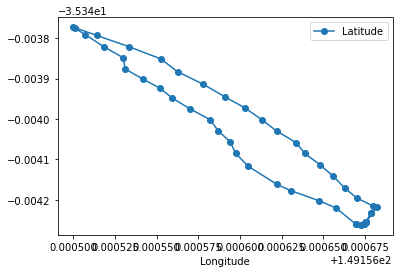

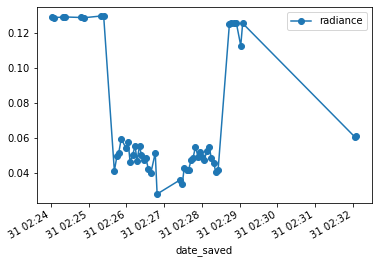

In [9]:
allASDdata[allASDdata.index==550].plot('Longitude', 'Latitude', style='-o')
allASDdata[allASDdata.index==550].plot('date_saved', 'radiance', style='-o')

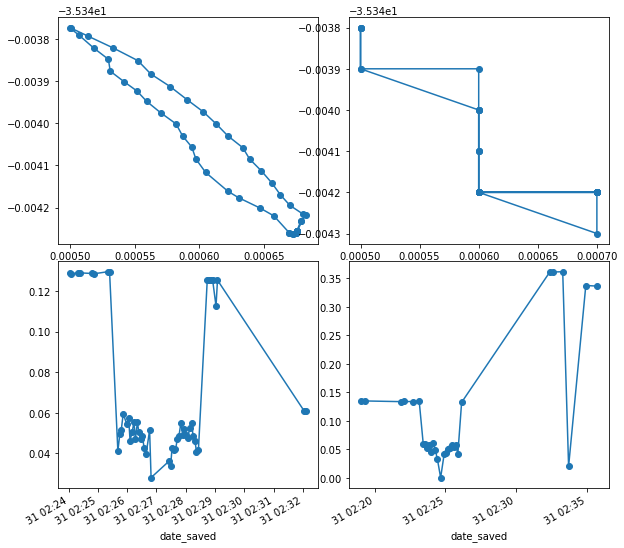

In [10]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(8.5, 8.5))
plt.tight_layout(pad=1.5, w_pad=0.0, h_pad=0.0)
allASDdata[allASDdata.index==550].plot('Longitude', 'Latitude', style='-o', ax=axes[0,0], legend=False)
allASDdata[allASDdata.index==550].plot('date_saved', 'radiance', style='-o', ax=axes[1,0], legend=False)
allSpeckiedata[allSpeckiedata.index==550].plot('Longitude', 'Latitude', style='-o', ax=axes[0,1], legend=False)
allSpeckiedata[allSpeckiedata.index==550].plot('date_saved', 'Rad_Target', style='-o', ax=axes[1,1], legend=False)
plt.savefig('fig1.png')

In [11]:
import numpy as np
allASDGround = allASDdata[np.logical_and(allASDdata.date_saved > pd.Timestamp(2020,7,31,2,25,45), allASDdata.date_saved < pd.Timestamp(2020,7,31,2,28,20))]
allSpeckieGround = allSpeckiedata[np.logical_and(allSpeckiedata.date_saved > pd.Timestamp(2020,7,31,2,23,30), allSpeckiedata.date_saved < pd.Timestamp(2020,7,31,2,26,0))]

allASDPanel = allASDdata[np.logical_or(allASDdata.date_saved > pd.Timestamp(2020,7,31,2,28,30), allASDdata.date_saved < pd.Timestamp(2020,7,31,2,25,30))]
allSpeckiePanel = allSpeckiedata[np.logical_and(allSpeckiedata.date_saved > pd.Timestamp(2020,7,31,2,20), allSpeckiedata.date_saved < pd.Timestamp(2020,7,31,2,23,10))]


In [12]:
allASDPanel = allASDPanel[~allASDPanel.Spec_number.isin([22,24,25])]

In [13]:
import MakeSpecDF

In [14]:
allSpeckieGround['Line'] = 1
allSpeckiePanel['Line'] = 1

/g/data/v10/public/modules/dea-env/20200713/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/g/data/v10/public/modules/dea-env/20200713/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [15]:
allSpeckieGround.rename(columns={'Rad_Target':'radiance'}, inplace = True)
allSpeckiePanel.rename(columns={'Rad_Target':'radiance'}, inplace = True)

/g/data/v10/public/modules/dea-env/20200713/lib/python3.6/site-packages/pandas/core/frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [16]:
#allASDground.reset_index(inplace=True)
allASDGroundSpec = MakeSpecDF.make_spec_df(allASDGround)
allSpeckieGroundSpec = MakeSpecDF.make_spec_df(allSpeckieGround)

allASDPanelSpec = MakeSpecDF.make_spec_df(allASDPanel)
allSpeckiePanelSpec = MakeSpecDF.make_spec_df(allSpeckiePanel)

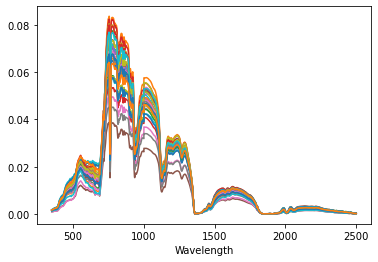

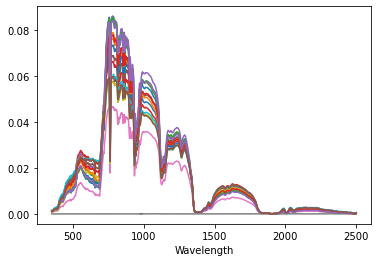

In [17]:
allASDGroundSpec.plot(legend=False)
allSpeckieGroundSpec.plot(legend=False)

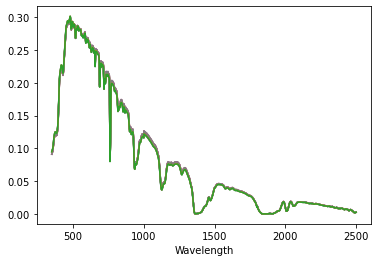

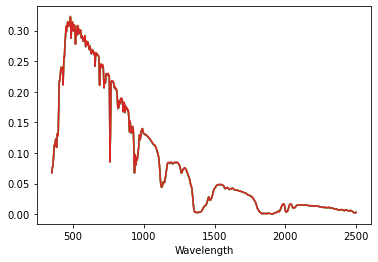

In [18]:
allASDPanelSpec.plot(legend=False)
allSpeckiePanelSpec.plot(legend=False)

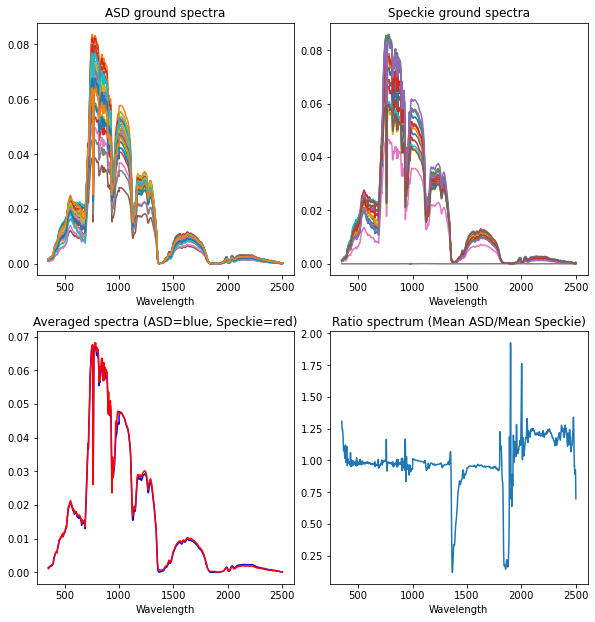

In [19]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(8.5, 8.5))
plt.tight_layout(pad=1.5, w_pad=0.5, h_pad=3.5)
allASDGroundSpec.mean(axis=1).plot(ax=axes[1,0], color='b')
allSpeckieGroundSpec.mean(axis=1).plot(ax=axes[1,0], color='r')
allASDGroundSpec.plot(ax=axes[0,0], legend=False)
allSpeckieGroundSpec.plot(ax=axes[0,1], legend=False)
(allASDGroundSpec.mean(axis=1)/allSpeckieGroundSpec.mean(axis=1)).plot(ax=axes[1,1])

axes[0,0].set_title('ASD ground spectra')
axes[0,1].set_title('Speckie ground spectra')
axes[1,0].set_title('Averaged spectra (ASD=blue, Speckie=red)')
axes[1,1].set_title('Ratio spectrum (Mean ASD/Mean Speckie)')
plt.savefig('fig2g.png')

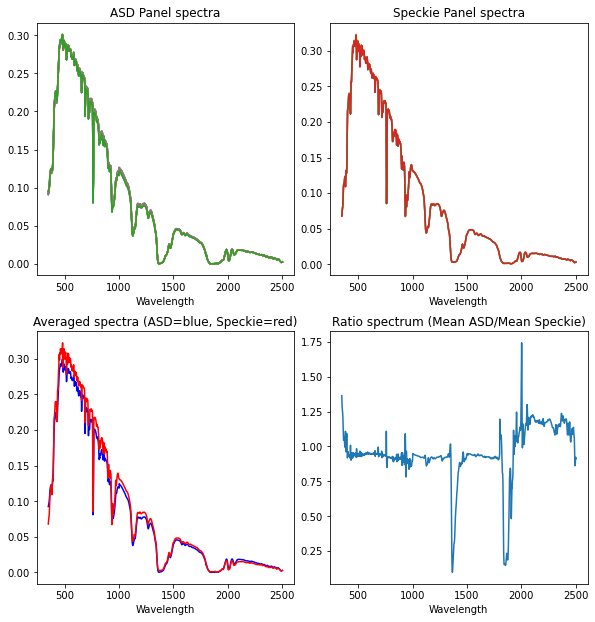

In [20]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(8.5, 8.5))
plt.tight_layout(pad=1.5, w_pad=0.5, h_pad=3.5)
allASDPanelSpec.mean(axis=1).plot(ax=axes[1,0], color='b')
allSpeckiePanelSpec.mean(axis=1).plot(ax=axes[1,0], color='r')
allASDPanelSpec.plot(ax=axes[0,0], legend=False)
allSpeckiePanelSpec.plot(ax=axes[0,1], legend=False)
(allASDPanelSpec.mean(axis=1)/allSpeckiePanelSpec.mean(axis=1)).plot(ax=axes[1,1])

axes[0,0].set_title('ASD Panel spectra')
axes[0,1].set_title('Speckie Panel spectra')
axes[1,0].set_title('Averaged spectra (ASD=blue, Speckie=red)')
axes[1,1].set_title('Ratio spectrum (Mean ASD/Mean Speckie)')
plt.savefig('fig2p.png')

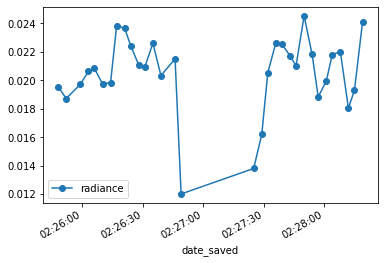

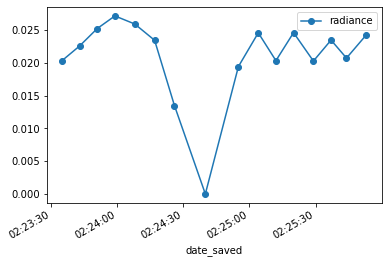

In [21]:
allASDGround[allASDGround.Wavelength==550].plot('date_saved', 'radiance', style='-o')
allSpeckieGround[allSpeckieGround.Wavelength==550].plot('date_saved', 'radiance', style='-o')

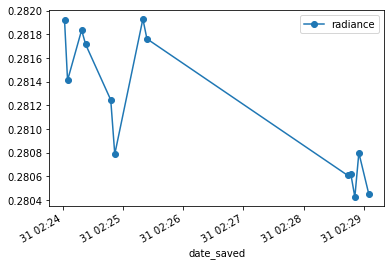

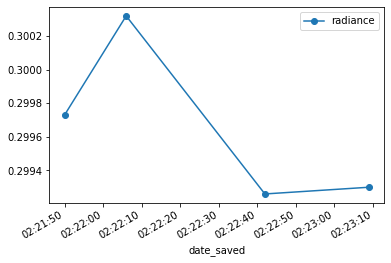

In [22]:
allASDPanel[allASDPanel.Wavelength==550].plot('date_saved', 'radiance', style='-o')
allSpeckiePanel[allSpeckiePanel.Wavelength==550].plot('date_saved', 'radiance', style='-o')

In [23]:
allASDGroundSpec.drop(columns=['radiance1-25', 'radiance2-0', 'radiance2-1'], inplace=True)
allSpeckieGroundSpec.drop(columns=['radiance1-13', 'radiance1-14'], inplace=True)
allSpeckieGroundSpec.drop(columns='radiance1-14', inplace=True)

KeyError: "['radiance1-14'] not found in axis"

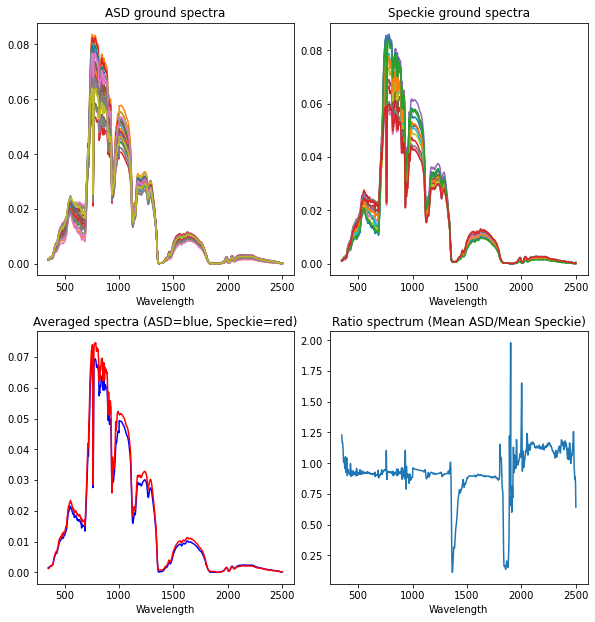

In [24]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(8.5, 8.5))
plt.tight_layout(pad=1.5, w_pad=0.5, h_pad=3.5)
allASDGroundSpec.mean(axis=1).plot(ax=axes[1,0], color='b')
allSpeckieGroundSpec.mean(axis=1).plot(ax=axes[1,0], color='red')
allASDGroundSpec.plot(ax=axes[0,0], legend=False)
allSpeckieGroundSpec.plot(ax=axes[0,1], legend=False)
(allASDGroundSpec.mean(axis=1)/allSpeckieGroundSpec.mean(axis=1)).plot(ax=axes[1,1])

axes[0,0].set_title('ASD ground spectra')
axes[0,1].set_title('Speckie ground spectra')
axes[1,0].set_title('Averaged spectra (ASD=blue, Speckie=red)')
axes[1,1].set_title('Ratio spectrum (Mean ASD/Mean Speckie)')

#axes[0,0].set_xlim(1750,1850)
#axes[0,1].set_xlim(1750,1850)
#axes[0,0].set_ylim(0,0.01250)
#axes[0,1].set_ylim(0,0.01250)

plt.savefig('fig3g.png')

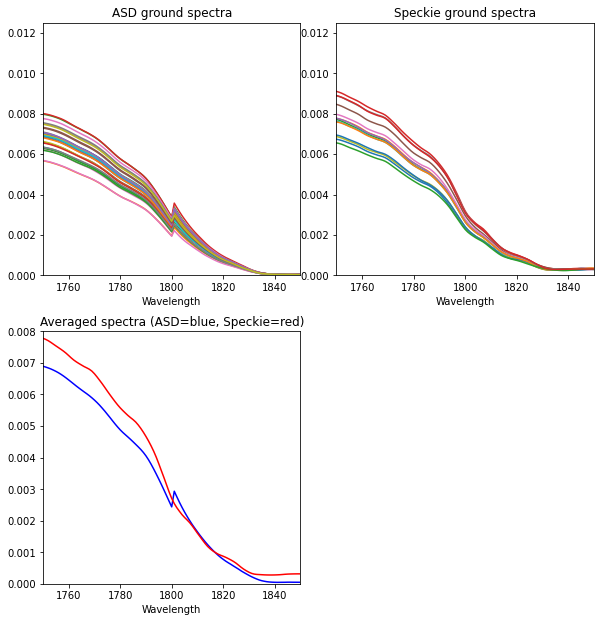

In [25]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(8.5, 8.5))
plt.tight_layout(pad=1.5, w_pad=0.5, h_pad=3.5)
allASDGroundSpec.mean(axis=1).plot(ax=axes[1,0],color='b')
allSpeckieGroundSpec.mean(axis=1).plot(ax=axes[1,0], color='r')
allASDGroundSpec.plot(ax=axes[0,0], legend=False)
allSpeckieGroundSpec.plot(ax=axes[0,1], legend=False)
#(allASDgroundSpec.mean(axis=1)/allSpeckiegroundSpec.mean(axis=1)).plot(ax=axes[1,1])

axes[0,0].set_title('ASD ground spectra')
axes[0,1].set_title('Speckie ground spectra')
axes[1,0].set_title('Averaged spectra (ASD=blue, Speckie=red)')
#axes[1,1].set_title('Ratio spectrum (Mean ASD/Mean Speckie)')

axes[0,0].set_xlim(1750,1850)
axes[0,1].set_xlim(1750,1850)
axes[1,0].set_xlim(1750,1850)
axes[0,0].set_ylim(0,0.01250)
axes[0,1].set_ylim(0,0.01250)
axes[1,0].set_ylim(0,0.0080)
axes[1,1].axis('off')


plt.savefig('fig4g.png')

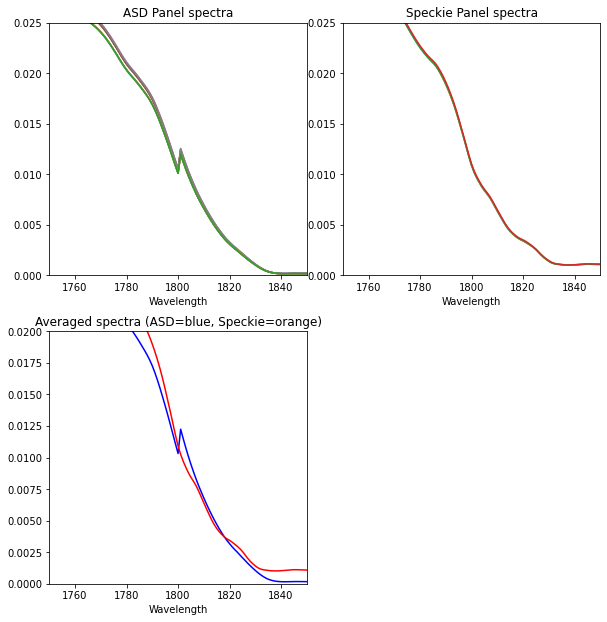

In [26]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(8.5, 8.5))
plt.tight_layout(pad=1.5, w_pad=0.5, h_pad=3.5)
allASDPanelSpec.mean(axis=1).plot(ax=axes[1,0], color='b')
allSpeckiePanelSpec.mean(axis=1).plot(ax=axes[1,0], color='r')
allASDPanelSpec.plot(ax=axes[0,0], legend=False)
allSpeckiePanelSpec.plot(ax=axes[0,1], legend=False)
#(allASDgroundSpec.mean(axis=1)/allSpeckiegroundSpec.mean(axis=1)).plot(ax=axes[1,1])

axes[0,0].set_title('ASD Panel spectra')
axes[0,1].set_title('Speckie Panel spectra')
axes[1,0].set_title('Averaged spectra (ASD=blue, Speckie=orange)')
#axes[1,1].set_title('Ratio spectrum (Mean ASD/Mean Speckie)')

axes[0,0].set_xlim(1750,1850)
axes[0,1].set_xlim(1750,1850)
axes[1,0].set_xlim(1750,1850)
axes[0,0].set_ylim(0,0.0250)
axes[0,1].set_ylim(0,0.0250)
axes[1,0].set_ylim(0,0.020)
axes[1,1].axis('off')


plt.savefig('fig4p.png')